# Cleaning the data
<li>Aggregate all Countries to their Continents.
<li>Drop US States
<li>Look for and handle missing values
<li>Create indicator variables for categoricals, bin where you feel appropriate
<li>Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”
<li>Visualize the distributions of cleaned variables

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

#import the data
X=pd.read_csv("/Users/Arati/Documents/UIS/FALL2016/DataScience/PythonPrograms/CS570-master/RedditShortDemoSurvey-1-Cleaned.csv")



In [59]:
X

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,USState,HouseholdIncome,TreatedSubredditdata,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#aggregating country into continents
import pycountry

In [6]:
import incf.countryutils 
import incf.countryutils.data
import types
from incf.countryutils import transformations

SyntaxError: invalid syntax (transformations.py, line 151)

In [ ]:
from incf.countryutils import transformations

# Task 1 
<li>Dropping US states
<li>Dropping Unnamed: Columns
<li>TreatedSubredditdata

In [60]:
X.drop(["USState","Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18",
       "Unnamed: 19" ], axis=1, inplace=True)

In [61]:
X.drop(["Unnamed: 14"], axis=1, inplace=True)

In [62]:
X.drop(["TreatedSubredditdata"], axis=1, inplace=True)

In [63]:
X.columns

Index(['Entry Id', 'Gender', 'AgeCategory', 'MaritalStatus',
       'EmploymentStatus', 'MilitaryService', 'ChildrenUnderage18',
       'Education', 'Country', 'HouseholdIncome',
       'Are you a dog or a cat person?',
       'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [64]:
X

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",I like cats.,Munster


# Task 1 
<li> Look for and handle missing values
<li>Check for null values or missing data

In [65]:
# FOR ENTRY ID
X[X['Entry Id'].isnull()]


,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [66]:
#FOR Gender
X[X['Entry Id'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [67]:
#FOR AgeCategory
X[X['AgeCategory'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [68]:
#FOR MaritalStatus
X[X['MaritalStatus'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [69]:
#FOR EmploymentStatus
X[X['EmploymentStatus'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [70]:
#FOR EmploymentStatus
X[X['MilitaryService'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [71]:
#FOR ChildrenUnderage18
X[X['ChildrenUnderage18'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [72]:
#FOR Education
X[X['Education'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [73]:
#FOR Country
X[X['Country'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [74]:
#FOR HouseholdIncome
X[X['HouseholdIncome'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [75]:
#FOR Are you a dog or a cat person?
X[X['Are you a dog or a cat person?'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,none,NaN,1
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,"$70,000 - $99,999",NaN,programming')


In [76]:
# Assigning value NONE to null values
X['Are you a dog or a cat person?'] = X['Are you a dog or a cat person?'].fillna(value='none')

In [77]:
X[X['Are you a dog or a cat person?'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [78]:
#If you were a cheese, what cheese would you be?
X[X['If you were a cheese, what cheese would you be?'].isnull()]

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"


In [79]:
#Completed checking for null values

# Task 1 
<li>Create indicator variables for categoricals, bin where you feel appropriate
<li>Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”

In [80]:
X['Gender'].unique()

array(['Male', 'Female', 'None'], dtype=object)

In [81]:
X['AgeCategory'].unique()

array(['25-34', '18-24', '35-44', '45-54', 'Under 18', '55-64',
       '65 or Above', 'None'], dtype=object)

In [82]:
X['MaritalStatus'].unique()

array(['Blank', 'Married/civil union/domestic partnership',
       'In a relationship', 'Forever Alone', 'Single', 'Engaged', 'Widowed'], dtype=object)

In [83]:
X['EmploymentStatus'].unique()

array(['Employed full time', 'Freelance',
       'Not employed, but looking for work',
       'Not employed and not looking for work', 'Student', 'None',
       'Retired'], dtype=object)

In [84]:
X['MilitaryService'].unique()

array(['none', 'No', 'Yes'], dtype=object)

In [85]:
X['ChildrenUnderage18'].unique()

array(['No', 'Yes', 'None'], dtype=object)

In [86]:
X['Education'].unique()

array(["Bachelor's degree", 'Some college',
       'High school graduate or equivalent',
       'Graduate or professional degree', 'Trade or Vocational degree',
       'Associate degree', 'Some high school', 'None'], dtype=object)

In [87]:
X['Country'].unique()

array(['United States', 'Germany', 'Romania', 'United Kingdom',
       'Republic of Ireland', 'France', 'Canada', 'Greece', 'Norway',
       'canada', 'Sweden', 'Switzerland', 'romania', 'Australia', 'Israel',
       'Netherlands', 'Bulgaria', 'Spain', 'Belgium', 'Poland', 'Finland',
       'the Netherlands', 'Republic of Ireland ', 'Brazil', 'Denmark',
       'United states of America. ', 'Ireland', 'Bosnia and Herzegovina',
       'Italy', 'Slovenia', 'The Netherlands', 'United Sates', 'Mexico',
       'India', 'Kuwait ', 'Canada ', 'united states of america', 'Chile',
       'FRANCE', 'United Arab Emirates', 'none', 'England', 'Iceland',
       'United Kingdom ', 'Costa Rica', 'Croatia', 'New Zealand',
       'Scotland', 'Barbados', 'Malaysia',
       'United States of America (Washington, DC)', 'South Africa',
       'Portugal', 'india', 'Pakistan', 'BELGIUM', 'colombia',
       'United States of America', 'Indonesia', 'united kingdom', 'México',
       'Malta', 'france', 'Japan', 

In [88]:
X['HouseholdIncome'].unique()

array(['$150,000 or more', 'Under $20,000', '$70,000 - $99,999', 'none',
       '$40,000 - $49,999', '$50,000 - $69,999', '$100,000 - $149,999',
       '$20,000 - $29,999', '$30,000 - $39,999'], dtype=object)

In [89]:
X['Are you a dog or a cat person?'].unique()

array(['none', 'I like dogs.', 'I like cats.', 'I like turtles.',
       'askreddit', 'movies', ' Reddit.com'], dtype=object)

In [90]:
#Cleaning the X['Are you a dog or a cat person?'] column. Assigning none to 'askreddit', 'movies', ' Reddit.com'.

X['Are you a dog or a cat person?'].replace('askreddit|movies| Reddit.com', 'none', regex=True, inplace=True)

In [91]:
X['Are you a dog or a cat person?'].unique()

array(['none', 'I like dogs.', 'I like cats.', 'I like turtles.'], dtype=object)

In [92]:
X['If you were a cheese, what cheese would you be?'].unique()


array(['none', 'Cheddar', 'American', 'Provolone', 'Munster', 'Swiss',
       'Goat', 'Feta', 'Other', 'Brie', 'Paneer', 'Limburger', '1',
       ' awww', ' f7u12', "programming')", ' Pics'], dtype=object)

In [93]:
#Cleaning the X[If you were a cheese, what cheese would you be?'] column.
#Assigning none to '1',' awww', ' f7u12', "programming'.


X['If you were a cheese, what cheese would you be?'].replace('1|awww| f7u12|programming','none', regex=True, inplace=True)


In [94]:
X['If you were a cheese, what cheese would you be?'].unique()

array(['none', 'Cheddar', 'American', 'Provolone', 'Munster', 'Swiss',
       'Goat', 'Feta', 'Other', 'Brie', 'Paneer', 'Limburger', ' none',
       "none')", ' Pics'], dtype=object)

# Task 1
<li>Visualize the distributions of cleaned variables

In [95]:

import matplotlib.pyplot as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [96]:
X.columns

Index(['Entry Id', 'Gender', 'AgeCategory', 'MaritalStatus',
       'EmploymentStatus', 'MilitaryService', 'ChildrenUnderage18',
       'Education', 'Country', 'HouseholdIncome',
       'Are you a dog or a cat person?',
       'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [97]:
#For Genders
X['Gender'].value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

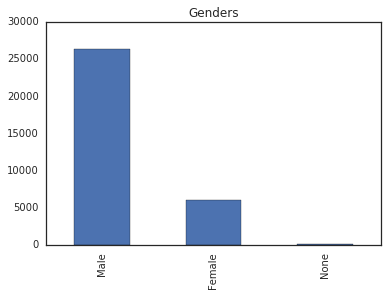

In [98]:
X['Gender'].value_counts().plot(kind='bar', title='Genders')

In [99]:
#For Age Category
X['AgeCategory'].value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: AgeCategory, dtype: int64

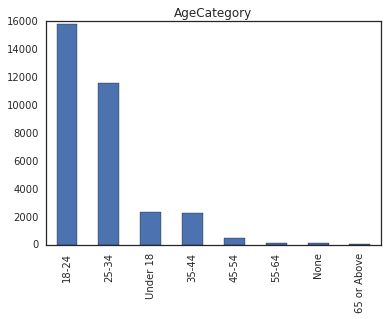

In [100]:
X['AgeCategory'].value_counts().plot(kind='bar',title='AgeCategory')

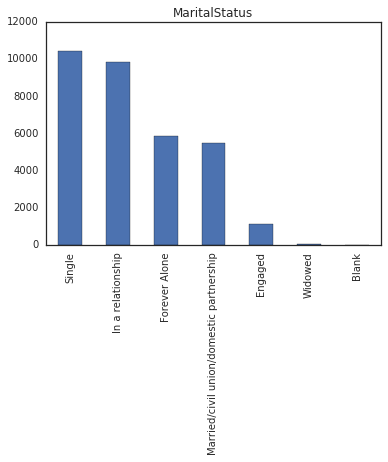

In [101]:
X['MaritalStatus'].value_counts().plot(kind='bar',title='MaritalStatus')

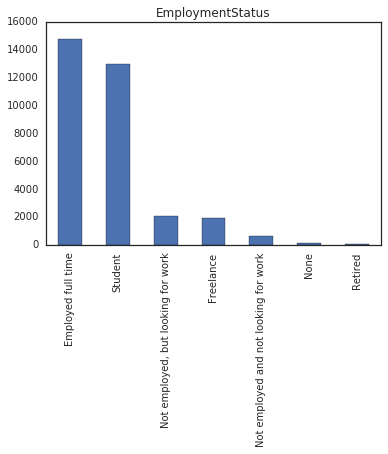

In [102]:
X['EmploymentStatus'].value_counts().plot(kind='bar',title='EmploymentStatus')

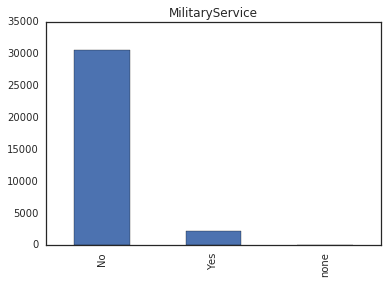

In [103]:
X['MilitaryService'].value_counts().plot(kind='bar',title='MilitaryService')

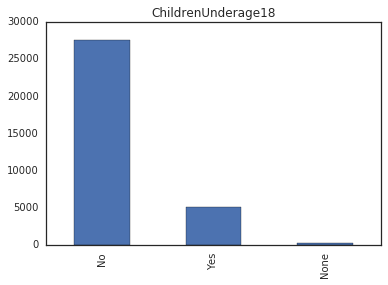

In [104]:
X['ChildrenUnderage18'].value_counts().plot(kind='bar',title='ChildrenUnderage18')

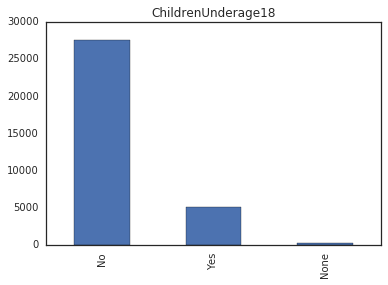

In [105]:
X['ChildrenUnderage18'].value_counts().plot(kind='bar',title='ChildrenUnderage18')

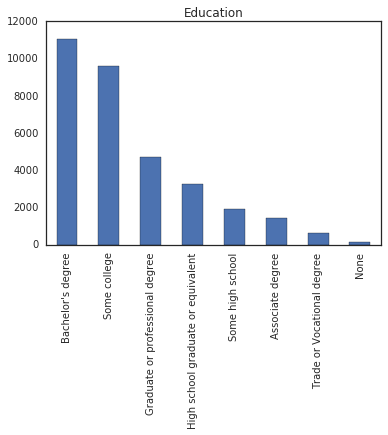

In [106]:
X['Education'].value_counts().plot(kind='bar',title='Education')

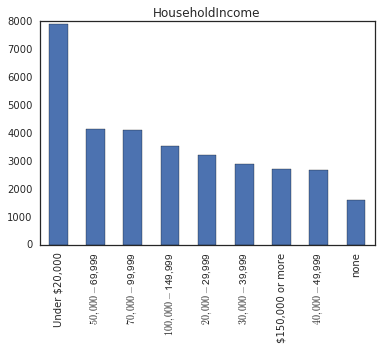

In [107]:
X['HouseholdIncome'].value_counts().plot(kind='bar',title='HouseholdIncome')

# TASK 2
<li>Use Pearson's Correlation Coefficient, determine which variables are most highly collinear
<li>Graph the results

In [108]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
letters = string.ascii_letters

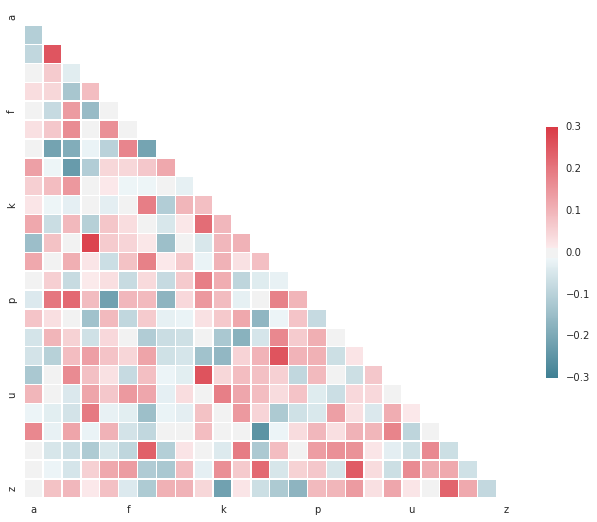

In [109]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
               columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Task 3
<li>Create a random forest model that predicts YOUR dependent variable based on the remaining variables. 
<li>If your dependent variable is muti-class (more than just two classes) then I'd like you to use a confusion matrix to measure model performance.  If you'd like, you may also experiment with one-vs-all AUC methods.  (50 pts)
<li>Determining YOUR dependent variable:
<li>IIf your Last Name Begins with Q-Z Income



In [110]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [111]:
X

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,"Under $20,000",none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,none,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",I like cats.,Munster


In [112]:
describe_categorical(X)

,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education,Country,HouseholdIncome,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754
unique,3,8,7,7,3,3,8,440,9,4,15
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,United States,"Under $20,000",I like dogs.,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,7892,17149,6562


In [113]:
# Defining Y variable
y=X.pop("HouseholdIncome")

In [114]:
# Drop the variables I don't feel like dealing with for this tutorial
X.drop(["Country", "Are you a dog or a cat person?", "If you were a cheese, what cheese would you be?"], axis=1, inplace=True)

In [115]:
X

,Entry Id,Gender,AgeCategory,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnderage18,Education
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree
2,3,Female,18-24,Blank,Freelance,none,No,Some college
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college


In [116]:
categorical_variables = ['Gender', 'AgeCategory', 'MaritalStatus','EmploymentStatus','MilitaryService','ChildrenUnderage18','Education']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [117]:
X

,Entry Id,Gender_Female,Gender_Male,Gender_None,AgeCategory_18-24,AgeCategory_25-34,AgeCategory_35-44,AgeCategory_45-54,AgeCategory_55-64,AgeCategory_65 or Above,...,ChildrenUnderage18_None,ChildrenUnderage18_Yes,Education_Associate degree,Education_Bachelor's degree,Education_Graduate or professional degree,Education_High school graduate or equivalent,Education_None,Education_Some college,Education_Some high school,Education_Trade or Vocational degree
0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [118]:

y.describe()


count             32754
unique                9
top       Under $20,000
freq               7892
Name: HouseholdIncome, dtype: object

In [119]:
#pd.get_dummies(y)
y = pd.get_dummies(y)

In [120]:
y

,"$100,000 - $149,999","$150,000 or more","$20,000 - $29,999","$30,000 - $39,999","$40,000 - $49,999","$50,000 - $69,999","$70,000 - $99,999","Under $20,000",none
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [121]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Entry Id,Gender_Female,Gender_Male,Gender_None,AgeCategory_18-24,AgeCategory_25-34,AgeCategory_35-44,AgeCategory_45-54,AgeCategory_55-64,AgeCategory_65 or Above,AgeCategory_None,AgeCategory_Under 18,MaritalStatus_Blank,MaritalStatus_Engaged,MaritalStatus_Forever Alone,MaritalStatus_In a relationship,MaritalStatus_Married/civil union/domestic partnership,MaritalStatus_Single,MaritalStatus_Widowed,EmploymentStatus_Employed full time,EmploymentStatus_Freelance,EmploymentStatus_None,EmploymentStatus_Not employed and not looking for work,"EmploymentStatus_Not employed, but looking for work",EmploymentStatus_Retired,EmploymentStatus_Student,MilitaryService_No,MilitaryService_Yes,MilitaryService_none,ChildrenUnderage18_No,ChildrenUnderage18_None,ChildrenUnderage18_Yes,Education_Associate degree,Education_Bachelor's degree,Education_Graduate or professional degree,Education_High school graduate or equivalent,Education_None,Education_Some college,Education_Some high school,Education_Trade or Vocational degree
0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,32752,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32750,32753,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32751,32754,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32752,32755,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)


In [123]:
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [125]:
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.594070263475


In [126]:
model.feature_importances_

array([  7.03148363e-01,   1.24722680e-02,   1.29475818e-02,
         1.52722393e-03,   7.34455824e-03,   5.11595143e-03,
         4.14170301e-03,   2.55112939e-03,   1.06003380e-03,
         5.21339810e-04,   5.67109433e-04,   2.79884451e-03,
         3.45545316e-05,   6.16375952e-03,   1.61197703e-02,
         2.02559836e-02,   1.22033052e-02,   2.21005234e-02,
         5.03887956e-04,   3.35209481e-02,   4.23328922e-03,
         8.99545693e-04,   3.39523396e-03,   5.19345183e-03,
         4.92782017e-04,   5.18264457e-03,   1.14567922e-02,
         1.16757573e-02,   3.32426542e-05,   1.30103461e-02,
         1.44918679e-03,   8.11727388e-03,   8.16054995e-03,
         1.27164390e-02,   8.31677004e-03,   1.15111461e-02,
         2.56092594e-03,   1.47292251e-02,   6.45199937e-03,
         5.31455894e-03])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


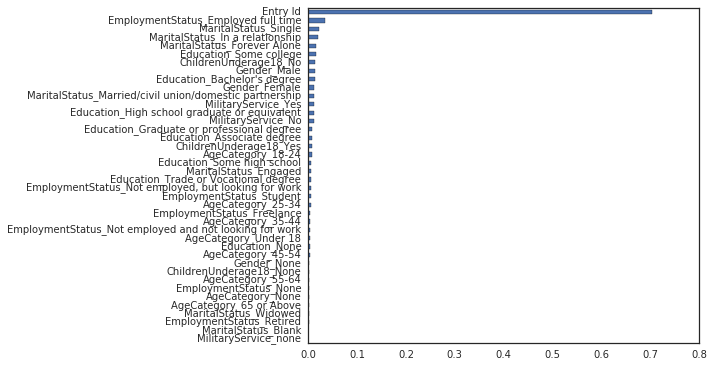

In [127]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

In [ ]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)